## Problem Set 2: Merging and regular expressions

**Total points (without extra credit)**: 30 

**Background on the policy context**: here, we're going to use two datasets to practice reshaping, merging, and regular expression patterns. Both datasets relate to the broader issue of which employers might be violating the rights of temporary guestworkers granted visas under the H-2A program. Here are some articles about potential exploitation of guestworkers by firms and inequality caused by minimal oversight:

- News media coverage of labor abuses of temporary guestworkers: https://www.buzzfeednews.com/article/kenbensinger/the-pushovers 
- GAO report on labor abuses of temporary guestworkers: https://www.gao.gov/products/gao-15-154

The following datasets are located in `pset2_inputdata` (need to unzip): 

- `jobs_clean`: a dataset of guestworker jobs posted by many employers, some of whom have been debarred (banned) from the program for labor abuses; others not debarred
- `debar`: a dataset of employers who committed violations of labor regulations meant to protect temporary guestworkers 


You can view a codebook here: https://docs.google.com/spreadsheets/d/1rF9GJEC8pPKxipD0TsoG9DVdqz3EJ-b-BHEtyioAX7I/edit?usp=sharing


In [1]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# 1. Reshaping data (13 points total)

Load the following dataset stored in `pset2_inputdata`: `debar.csv`

This represents employers temporarily banned from hiring workers (debar.csv); call this `debar`


View the head()


In [54]:
debar = pd.read_csv("/Users/alexwitheiler/Desktop/QSS20/QSS20_S24/my_psets/pset2_inputdata/debar.csv")


## 1.1 (1 point)

Print the number of rows in `debar` versus the number of unique employer names (`Name`). Is there one row per employer or multiple rows for some employers?

In [55]:
## your code here
len(debar.index)
debar["Name"].nunique()

# There are 114 rows and 98 unique employers
# There are multiple rows for some emplyees which explains the differerene

114

98

## 1.2 Investigating duplicated rows (2 points)

A. Create a new column in `debar`--`is_repeated`-- that tells us whether an employer (`Name`) is repeated > 1 times

*Hint*: there are multiple ways to solve this but some possibilities to get the list of names that are repeated are:
- Using value_counts() on the `Name` variable and extracting the index from that value counts 
- Using groupby to count the rows attached to one name

B. Print the rows where `is_repeated == True` and interpret

C. Subset to the rows where `is_repeated == True` and save that data as `mult_debar`. Print the head() and shape

In [56]:
# Count the occurrences of each name and identify names that are repeated more than once
repeated_names = debar['Name'].value_counts()
repeated_names = repeated_names[repeated_names > 1].index

# Create a new column 'is_repeated' based on whether the 'Name' appears in the list of repeated names
debar['is_repeated'] = debar['Name'].isin(repeated_names)

# Subset these rows to a new DataFrame and inspect its contents
mult_debar = debar[debar['is_repeated'] == True]
mult_debar

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True
14,Sharon Mathis,"Tifton, GA",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
15,SRT Farms,"Morton, TX",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
16,Mark Duncan,"Roosevelt, UT",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
17,"Maple Ridge Custom Services, LLC","Altheimer, AK",Failure to respond to audit (partial response),2 years,11/16/2014,11/15/2016,True
18,F&W Farms,"Ingalls, KS",Failure to respond to audit (partial response),2 years,12/10/2014,12/9/2016,True


In [5]:
mult_debar.head()
mult_debar.shape

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True


(32, 7)

## 1.3 Reshape mult_debar to wide to begin filtering out duplicates (4 points)

You want to separate out two cases:

- Cases where the repeat rows for one employer are due to duplicated data 
- Cases where the repeat rows for one employer represent repeated violations for different issues

There are various ways to check duplicates in this data (eg converting `Violation` to lowercase; replacing spelled-out states with two-dig state codes)

We're going to use the simple rule of:

- A row is a duplicate if, within an employer (defined by Name + City, State), the Start date for each row's violation is the same 

To begin to check this, reshape `mult_debar` to a wide dataframe (`mult_debar_wide`) with the following columns, treating the `Name` and `City, State` as the index for the pivot:

- Name
- City, State
- start_date_viol1
- start_date_viol2

Print the head and shape

In [57]:
## your code here
mult_debar.loc[:, 'Violation Count'] = mult_debar.groupby(['Name']).cumcount() + 1

# Pivot the data
mult_debar_wide = mult_debar.pivot_table(index=['Name'],
                                         columns='Violation Count',
                                         values='Start date',
                                         aggfunc='first')

# Rename columns to start_date_viol1, start_date_viol2, etc.
mult_debar_wide.columns = [f'start_date_viol{col}' for col in mult_debar_wide.columns]

# Reset index if needed to turn index back to columns
mult_debar_wide.reset_index(inplace=True)


mult_debar_wide
mult_debar.head()
mult_debar_wide.shape

/var/folders/62/8wnz9cb95nqd0__2m2bz0c180000gn/T/ipykernel_62341/3213388747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_debar.loc[:, 'Violation Count'] = mult_debar.groupby(['Name']).cumcount() + 1


,Name,start_date_viol1,start_date_viol2
0,Annabella Land & Cattle,5/9/2014,5/9/2014
1,Autumn Hill Orchard,7/6/2014,7/6/2014
2,"Caddo Creek Ranch, dba Paradise Ranch",7/20/2014,7/20/2014
3,Cisco Produce Inc.,12/10/2014,12/10/2015
4,Dove Creek Farms,2/9/2018,2/9/2018
5,F&W Farms,12/10/2014,12/10/2014
6,Loewen Harvesting LLC,8/20/2014,8/20/2014
7,Macky and Brad Farms,2/13/2015,2/13/2015
8,"Maple Ridge Custom Services, LLC",11/16/2014,11/16/2014
9,Mark Duncan,11/16/2014,11/16/2014


,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,Violation Count
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True,1
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True,1
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True,1
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True,1
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True,1


(16, 3)

## 1.4 Filter out duplicates from original debar data (6 points)

A. Using `mult_debar_wide`, add a column `is_dup` that takes value of True for cases where start_date_viol1 == start_date_viol2 marking the row as a duplicate

B. Going back to the original long-format data you loaded at the beginning- `debar`
    - For employers where `is_dup == True` as indicated by your wide-format dataframe, only keep `violnum == viol1`
    - For all other employers (so is_dup == False and ones we didnt need to check duplicates for), keep all violnum
    - Remove the `is_repeated` column from the `debar` data

**Hint**: you can complete part B without a for loop; `pd.concat` with axis = 0 (row binding) is one way

Call the resulting dataframe `debar_clean` and print the shape and # of unique employer names

In [58]:
# A. add 'is_dup' column
mult_debar_wide['is_dup'] = mult_debar_wide['start_date_viol1'] == mult_debar_wide['start_date_viol2']


# B. creating a dictionary where keys are the index (Name) from mult_debar_wide
# and values are the is_dup status, calling map(dup_mapping)
# to check each row in debar checks its Name against this dictionary and gets is_dup status.
dup_mapping = mult_debar_wide.set_index(['Name'])['is_dup']

# Apply this mapping to the 'debar' dataset
debar['is_dup'] = debar.set_index(['Name']).index.map(dup_mapping)

# Combine the rows that need to be filtered and those that do not need filtering
# Filter duplicates where is_dup is True and keep only the first occurrence
duplicates_filtered = debar[debar['is_dup'] == True].drop_duplicates(subset=['Name'], keep='first')

# Get all entries where either is_dup is False or NaN (not checked for duplicates)
not_duplicates = debar[debar['is_dup'] != True]

# Combine the two dataframes
debar_clean = pd.concat([duplicates_filtered, not_duplicates], axis=0)

# Remove 'is_repeated' and 'is_dup' columns
debar_clean.drop(columns=['is_repeated', 'is_dup'], inplace=True)

# Print the shape and the number of unique employer names
debar_clean.shape
debar_clean['Name'].nunique()

(101, 6)

98

# 2. Merging and regex (17 points total)



##2.1 Load data on job postings

The previous dataset contains a small subset of employers who faced temporary bans due to violations of H-2A program regulations

Since most of the bans have expired, we're going to see which of those employers posted new H-2A jobs in the first quarter of 2021 

Loading the `jobs_clean.csv` data stored in `pset4_inputdata`

In [59]:
jobs = pd.read_csv("/Users/alexwitheiler/Desktop/QSS20/QSS20_S24/my_psets/pset2_inputdata/jobs.csv")
jobs.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,ADDENDUM_B_HOUSING_ATTACHED,TOTAL_HOUSING_RECORDS,MEALS_PROVIDED,MEALS_CHARGED,MEAL_REIMBURSEMENT_MINIMUM,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS
0,H-300-20199-721302,Determination Issued - Withdrawn,2020-07-17 14:50:40.840,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,Y,"Fazio Farms Operating Company, LLC",NaN,...,N,1,Y,12.68,12.68,55.0,13607017661,faziofarms@gmail.com,NaN,0
1,H-300-20231-773906,Determination Issued - Certification,2020-08-20 10:38:15.620,2020-10-01 00:00:00.000,Association - Agent,N,Seasonal,N,Charlie Sunderland,Panter & Sunderland Nursery,...,N,1,N,NaN,12.68,55.0,19318083783,NaN,https://www.jobs4tn.gov/vosnet/Default.aspx,0
2,H-300-20231-774123,Determination Issued - Certification,2020-08-24 15:33:14.340,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,Michael Rudebusch,NaN,...,N,1,N,NaN,12.68,55.0,19369333827,fayethlynpitre@rocketmail.com,NaN,0
3,H-300-20231-774151,Determination Issued - Certification,2020-08-21 12:08:09.760,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,Lodahl Farms,NaN,...,Y,2,N,NaN,12.68,55.0,14069637560,lodahl_kelsey@yahoo.com,NaN,0
4,H-300-20231-774508,Determination Issued - Certification,2020-08-20 10:17:34.530,2020-10-01 00:00:00.000,Individual Employer,Y,Seasonal,N,"Dunson Harvesting, Inc.","Dunson Harvesting, Inc.",...,Y,8,N,NaN,12.68,55.0,18632939888,NaN,www.employflorida.com,4


##  2.2 Try inner join on employer name  (2 points)

- Use the `EMPLOYER_NAME` field of the `jobs` dataset
- Use the `Name` field of the `debar_clean` dataset 

A. Use pd.merge with an inner join on those fields to see whether there are any exact matches. 

B. If there are exact matches, print the row(s) with exact matches



In [60]:
matches = pd.merge(jobs, debar_clean, left_on='EMPLOYER_NAME', right_on='Name', how='inner')

matches
#one match


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,Name,"City, State",Violation,Duration,Start date,End date
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,Rafael Barajas,NaN,...,18632732686,NaN,https://seasonaljobs.dol.gov/,7,Rafael Barajas,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017


## 2.3 Targeted regex (10 points total)

You want to see if you can increase the exact match rate with some basic cleaning of each 
of the employer name fields in each dataset 

### 2.3.1 Converting to upper (2 points)

A. Convert the `EMPLOYER_NAME` and `Name` fields to uppercase using list comprehension rather than df.varname.str.upper() (it's fine to do a separate list comprehension line for each of the two columns)

B. Print a random sample of 15 values of each result

C. Assign the full vector of uppercase names back to the original data, writing over the original `EMPLOYER_NAME` and `Name` columns 


In [61]:
## insert your code to turn into uppercase here
# Convert 'EMPLOYER_NAME' in jobs DataFrame to uppercase
jobs['EMPLOYER_NAME'] = jobs['EMPLOYER_NAME'].apply(lambda name: name.upper())

# Convert 'Name' in debar_clean DataFrame to uppercase
debar_clean['Name'] = debar_clean['Name'].apply(lambda name: name.upper())

In [62]:
## insert your code for the random sample
jobs["EMPLOYER_NAME"].sample(n=15)
debar_clean["Name"].sample(n=15)

1116                             KUNAFIN LLC
37                     HIGH COUNTRY LAMB LLC
1130        JACK CREEK LAND & CATTLE COMPANY
2086                       KORY A STEPHENSEN
2026    NATURAL PRAIRIE DAIRY - INDIANA, LLC
1362                 NORTHWOODS APIARIES LLC
202                              LORI HOHERZ
1180                        KAUPO RANCH LTD.
276                    VASQUEZ BROTHERS INC.
1569                 JORDY VEILLON FARMS LLC
1067                        KYLE R. FONTENOT
2466                      THORNOCK RANCH LLC
1149                 IKD CAJUN CRAWFISH, LLC
622                  ECOSYSTEM CONCEPTS INC.
1754                    HUNTERTON FARM, INC.
Name: EMPLOYER_NAME, dtype: object

38                             LESLIE COOK
2                            TRUST NURSERY
77                   MYRKA MIREYA CARDENAS
42                     LEONARD SMITH FARMS
74    JIM AND ANN SHIPLEY WILLIAM SHIPLEY*
40                         JEREMY CHANDLER
54                 FIRST AMERICAN HOLDINGS
81                             OLSON FARMS
99                TRAVIS AND TARA LAMBOURN
90          RUBEN RUIZ (DESOTO HARVESTING)
66                            GERMAN FARMS
7                      AUTUMN HILL ORCHARD
88                           YESENIA PEREZ
97                                AB RANCH
19                      CISCO PRODUCE INC.
Name: Name, dtype: object

In [64]:
## insert your code for assigning the uppercase names back to the data
# Overwrite 'EMPLOYER_NAME' in jobs DataFrame with its uppercase version
jobs['EMPLOYER_NAME'] = jobs['EMPLOYER_NAME'].str.upper()

# Overwrite 'Name' in debar_clean DataFrame with its uppercase version
debar_clean['Name'] = debar_clean['Name'].str.upper()
debar_clean

,Name,"City, State",Violation,Duration,Start date,End date
6,ANNABELLA LAND & CATTLE,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015
7,AUTUMN HILL ORCHARD,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016
11,LOEWEN HARVESTING LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015
12,ROLLO FARM LABOR CONTRACTOR,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016
...,...,...,...,...,...,...
107,WALKER PLACE,"Danville, IL",Failure to comply with the employer's obligati...,2 months,11/19/2019,1/26/2020
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,"Jefferson, ME",WHD Debarment,3 years,3/8/2017,3/8/2020
110,JESUS LEDESMA,"Mulberry, FL",Failure to Respond to Audit Request,2 years,2/8/18,2/8/20
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),"Collins, Georgia",WHD Debarment,3 years,4/9/17,4/9/20


### 2.3.2 Cleaning up punctuation (4 points)

You notice that INC, CO, and LLC are sometimes followed by a period (.) but sometimes not

A. For each dataset, write a regex pattern using `re.sub` to remove the . but only if it's preceded by INC, LLC, or CO 

Make sure LLC, INC, CO remain part of the string but just without the dot

B. Test the pattern on the positive and negative example we provide below and print the result. See the Github issue for examples of what to return


**Hint**: https://stackoverflow.com/questions/7191209/python-re-sub-replace-with-matched-content



In [65]:
pos_example_1 = "CISCO PRODUCE INC."
pos_example_2 = "AVOYELLES HONEY CO., LLC"
neg_example = "E.V. RANCH LLP"

In [66]:
## insert your code here with the regex pattern for part A
def remove_period(input_string):
    pattern = r"(INC|CO|LLC)\."
    return re.sub(pattern, r"\1", input_string)

## insert your code to use re.sub to apply the pattern to the test cases for part B
print("Positive example 1 Old:", pos_example_1, "New:", remove_period(pos_example_1))
print("Positive example 2 Old:", pos_example_2, "New:", remove_period(pos_example_2))
print("Negative example Old:", neg_example, "New:", remove_period(neg_example))

Positive example 1 Old: CISCO PRODUCE INC. New: CISCO PRODUCE INC
Positive example 2 Old: AVOYELLES HONEY CO., LLC New: AVOYELLES HONEY CO, LLC
Negative example Old: E.V. RANCH LLP New: E.V. RANCH LLP


### 2.3.3 (4 points)

Use that pattern in conjunction with `re.sub` and list comprehension to clean the employer name columns in each dataset. Save the new columns as `name_clean` in each. Then, use row subsetting to (1) subset to rows that changed names and (2) for:

- `debar_clean` print the `Name` and `name_clean` columns
- `jobs` print the `EMPLOYER_NAME` and `name_clean` columns

Make sure to use the uppercase versions of the variables


In [67]:
## your code here to clean the columns

def clean_name(name):
    pattern = r'\b(INC|CO|LLC)\.'
    return re.sub(pattern, r'\1', name)

# Apply the cleaning function to each dataset
jobs['name_clean'] = [clean_name(name) for name in jobs['EMPLOYER_NAME'].str.upper()]
debar_clean['name_clean'] = [clean_name(name) for name in debar_clean['Name'].str.upper()]

# Subset and print changes
changed_jobs = jobs[jobs['EMPLOYER_NAME'].str.upper() != jobs['name_clean']]
changed_debar = debar_clean[debar_clean['Name'].str.upper() != debar_clean['name_clean']]

print("Changes in debar_clean:")
print(changed_debar[['Name', 'name_clean']])

Changes in debar_clean:
                                Name                       name_clean
3              ANTON FERTILIZER INC.             ANTON FERTILIZER INC
4   GREAT PLAINS FLUID SERVICE, INC.  GREAT PLAINS FLUID SERVICE, INC
5                        PROMAX INC.                       PROMAX INC
13                     REIMER'S INC.                     REIMER'S INC
19                CISCO PRODUCE INC.                CISCO PRODUCE INC
23                     REIMER’S INC.                     REIMER’S INC
33                GERONIMO SHEEP CO.                GERONIMO SHEEP CO
46          ALTENDORF TRANSPORT INC.          ALTENDORF TRANSPORT INC
56                CISCO PRODUCE INC.                CISCO PRODUCE INC
72      SAXTONS RIVER ORCHARDS, INC.      SAXTONS RIVER ORCHARDS, INC
91          AVOYELLES HONEY CO., LLC          AVOYELLES HONEY CO, LLC


In [68]:
## your code here to print the head
changed_debar["name_clean"].head()
changed_jobs["name_clean"].head()

3                ANTON FERTILIZER INC
4     GREAT PLAINS FLUID SERVICE, INC
5                          PROMAX INC
13                       REIMER'S INC
19                  CISCO PRODUCE INC
Name: name_clean, dtype: object

4                      DUNSON HARVESTING, INC
7     FARM LABOR ASSOCIATION FOR GROWERS, INC
14                          MCLAIN FARMS, INC
17                         BONNIE PLANTS, INC
18                 B & W QUALITY GROWERS, INC
Name: name_clean, dtype: object

## 2.4 More joins and more cleaning (5 points)

A. Conduct another inner join between `jobs` and `debar_clean` now using the `name_clean` column; print the result. Did the cleaning result in any more employers matched between the two datasets?

B. Create a new column in `debar_clean` called `name_clean_2` that uses regex to take the following name in that dataset:

- `SLASH E.V. RANCH LLP` in the `debar_clean` dataset

And cleans it up so that it matches with this employer in `jobs`

- `SLASH EV RANCH` in the `jobs` dataset

Eg a pattern to remove the dots in the EV and the space+LLP-- you can apply the pattern to all employer names in debar_clean (so don't need to worry about only applying it to that one employer)


C. Conduct a left join using `name_clean_2` as the join column where the left hand dataframe is `jobs`; right hand dataframe is `debar_clean`, store the result as a dataframe, and print the rows where the merge indicator indicates the row was found in both dataframe

**Note**: this manual cleaning process is inefficient and helps motivate why talked about fuzzy matching. Fuzzy matching could recognize that Slash EV ranch is a highly similar string to slash ev ranch llp and match them without us needing to use regex to make the strings identical.

In [69]:
## your code here
# A
inner_join_a = pd.merge(jobs, debar_clean, left_on='name_clean', right_on='name_clean', how='inner')

inner_join_a
# There are not any more employers matches between the two datasets.


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,name_clean,Name,"City, State",Violation,Duration,Start date,End date
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,NaN,https://seasonaljobs.dol.gov/,7,RAFAEL BARAJAS,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017


In [70]:
# B
def clean_names(name):
    # Remove dots after initials and spaces before LLP
    name = re.sub(r'(E|V)\.', r'\1', name)  # Converts 'E.V.' to 'EV'
    name = re.sub(r'\s+LLP\b', '', name)  # Removes ' LLP'
    return name

# Apply the cleaning function to create the new column
debar_clean['name_clean_2'] = debar_clean['Name'].apply(clean_names)

# Print the updated DataFrame to check the new column
print(debar_clean[['Name', 'name_clean_2']])

#Check E.V. Regex
neg_example = "E.V. RANCH LLP"
print("Negative example Old:", neg_example, "New:", clean_names(neg_example))


                                                  Name  \
6                              ANNABELLA LAND & CATTLE   
7                                  AUTUMN HILL ORCHARD   
8                CADDO CREEK RANCH, DBA PARADISE RANCH   
11                               LOEWEN HARVESTING LLC   
12                         ROLLO FARM LABOR CONTRACTOR   
..                                                 ...   
107                                       WALKER PLACE   
108  COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...   
110                                      JESUS LEDESMA   
112        B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL)   
113                                        DELIA ROJAS   

                                          name_clean_2  
6                              ANNABELLA LAND & CATTLE  
7                                  AUTUMN HILL ORCHARD  
8                CADDO CREEK RANCH, DBA PARADISE RANCH  
11                               LOEWEN HARVESTING LLC  
12                

In [71]:
# C
merged_data = pd.merge(jobs, debar_clean, left_on='name_clean', right_on='name_clean_2', how='inner', indicator=True)

# Filter and print rows where the merge indicator is 'both', indicating presence in both DataFrames
matched_rows = merged_data[merged_data['_merge'] == 'both']
matched_rows

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,name_clean_x,Name,"City, State",Violation,Duration,Start date,End date,name_clean_y,name_clean_2,_merge
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,RAFAEL BARAJAS,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017,RAFAEL BARAJAS,RAFAEL BARAJAS,both
1,H-300-20306-894148,Determination Issued - Certification,2020-11-02 18:11:29.140,2020-11-24 00:00:00.000,Individual Employer,N,Seasonal,N,SLASH EV RANCH,NaN,...,SLASH EV RANCH,SLASH E.V. RANCH LLP,"Rifle, CO",WHD Debarment,1 year,11/15/2014,11/14/2015,SLASH E.V. RANCH LLP,SLASH EV RANCH,both


# 3. Optional extra credit 1: regex to separate companies from individuals (1 point)

You notice some employers in `debar_clean` have both the name of the company and the name of individual, e.g.:
    
COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*

Use the uppercase/cleaned `name_clean` in `debar_clean`

A. Write a regex pattern that does the following:
    - Captures the pattern that occurs before COMPANY if (COMPANY) is in string; so in example above, extracts COUNTY FAIR FARM 
    - Captures the pattern that occurs before INDIVIDUAL if (INDIVIDUAL) is also in string -- so in above, extracts ANDREW WILLIAMSON (so omit the "and")
    
B. Test the pattern on `pos_example` and `neg_example`-- make sure former returns a list (if using find.all) or match object (if using re.search) with the company name and individual name separated out; make sure latter returns empty
    
**Hints and resources**: for step A, you can either use re.search, re.match, or re.findall; don't worry about matching B&R Harvesting and Paul Cruz (Individual)

- Same regex resources as above
    

In [74]:
debar_clean

,Name,"City, State",Violation,Duration,Start date,End date,name_clean,name_clean_2,co_name,ind_name
6,ANNABELLA LAND & CATTLE,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,
7,AUTUMN HILL ORCHARD,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH",
11,LOEWEN HARVESTING LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,
12,ROLLO FARM LABOR CONTRACTOR,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,
...,...,...,...,...,...,...,...,...,...,...
107,WALKER PLACE,"Danville, IL",Failure to comply with the employer's obligati...,2 months,11/19/2019,1/26/2020,WALKER PLACE,WALKER PLACE,WALKER PLACE,
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,"Jefferson, ME",WHD Debarment,3 years,3/8/2017,3/8/2020,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON
110,JESUS LEDESMA,"Mulberry, FL",Failure to Respond to Audit Request,2 years,2/8/18,2/8/20,JESUS LEDESMA,JESUS LEDESMA,JESUS LEDESMA,
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),"Collins, Georgia",WHD Debarment,3 years,4/9/17,4/9/20,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),


In [31]:

def extract_entities(text):
    # Regex pattern to find the relevant company and individual names
    pattern = r'(.+?) \(COMPANY\)(?: AND (.*?) \(INDIVIDUAL\))?'
    matches = re.findall(pattern, text)
    return matches[0] if matches else []

# Test examples
pos_example = "COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)"
neg_example = "RAFAEL BARAJAS"

# Testing the function with both examples
pos_results = extract_entities(pos_example)
neg_results = extract_entities(neg_example)

# Outputs
pos_results, neg_results


(('COUNTY FAIR FARM', 'ANDREW WILLIAMSON'), [])

C. Iterate over the `name_clean` column in debar and use regex to create two new columns in `debar_clean`:
   - `co_name`: A column for company (full `name_clean` string if no match; pattern before COMPANY if one extracted)
   - `ind_name`: A column for individual (full `name_clean` string if no match; pattern before INDIVIDUAL if one extracted)
 


In [49]:
def extract_entities(text):
    # Check if the pattern contains (INDIVIDUAL) but not (COMPANY)
    individual_pattern = r'(.+?) AND (.+?) \(INDIVIDUAL\)'
    company_pattern = r'(.+?) \(COMPANY\)'

    # Search for individual names
    individual_match = re.search(individual_pattern, text)
    company_match = re.search(company_pattern, text)

    if company_match and individual_match:
        company = company_match.group(1)
        individual = individual_match.group(2)
    elif company_match:
        company = company_match.group(1)
        individual = ''
    elif individual_match:
        company = individual_match.group(1)
        individual = individual_match.group(2)
    else:
        company = text
        individual = ''

    return company, individual


debar_clean['co_name'] = debar_clean['name_clean'].apply(lambda x: extract_entities(x)[0])
debar_clean['ind_name'] = debar_clean['name_clean'].apply(lambda x: extract_entities(x)[1])

debar_clean[['name_clean', 'co_name', 'ind_name']]



,name_clean,co_name,ind_name
6,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,
7,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH",
11,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,
12,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,
...,...,...,...
107,WALKER PLACE,WALKER PLACE,
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON
110,JESUS LEDESMA,JESUS LEDESMA,
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING,PAUL CRUZ


In [73]:


# Function to extract company and individual names based on regex
def extract_entities(text):
    pattern = r'(.+?) \(COMPANY\)(?: AND (.*?) \(INDIVIDUAL\))?'
    matches = re.findall(pattern, text)
    return matches[0] if matches else []

# Apply the function and create new columns
debar_clean['co_name'] = debar_clean['name_clean'].apply(lambda x: extract_entities(x)[0] if extract_entities(x) else x)
debar_clean['ind_name'] = debar_clean['name_clean'].apply(lambda x: extract_entities(x)[1] if extract_entities(x) else '')

# Display the updated DataFrame to verify the new columns
debar_clean[['name_clean', 'co_name', 'ind_name']]


,name_clean,co_name,ind_name
6,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,
7,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH",
11,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,
12,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,
...,...,...,...
107,WALKER PLACE,WALKER PLACE,
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON
110,JESUS LEDESMA,JESUS LEDESMA,
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),


In [45]:
import pandas as pd
import re

# Function to extract company and individual names based on regex
def extract_entities(text):
    # Regex pattern to find the relevant company and individual names
    pattern = r'(.+?) \(COMPANY\)(?: AND (.*?) \(INDIVIDUAL\))?'
    matches = re.findall(pattern, text)
    if matches:
        # Extract company and optionally individual if matched
        company, individual = matches[0]
    else:
        # If not matched, it could be an individual's name or a company name without (COMPANY)
        company = text
        individual = ''

        # Check if it's an individual's name with (INDIVIDUAL)
        individual_pattern = r'(.*?) \(INDIVIDUAL\)'
        individual_match = re.search(individual_pattern, text)
        if individual_match:
            company = ''
            individual = individual_match.groups()[0]

    return company, individual

# Apply the function and create new columns
debar_clean['co_name'] = debar_clean['name_clean'].apply(lambda x: extract_entities(x)[0])
debar_clean['ind_name'] = debar_clean['name_clean'].apply(lambda x: extract_entities(x)[1])

# Display the updated DataFrame to verify the new columns
debar_clean[['name_clean', 'co_name', 'ind_name']]


,name_clean,co_name,ind_name
6,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,
7,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH",
11,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,
12,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,
...,...,...,...
107,WALKER PLACE,WALKER PLACE,
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON
110,JESUS LEDESMA,JESUS LEDESMA,
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),,B & R HARVESTING AND PAUL CRUZ


In [46]:
import pandas as pd

# Assuming debar_clean is already defined and contains the name_clean column
# Function provided by you
def extract_entities(text):
    pattern = r'(.+?) \(COMPANY\)(?: AND (.*?) \(INDIVIDUAL\))?'
    matches = re.findall(pattern, text)
    if matches:
        # If matches are found, extract the first group as company and the second group (if present) as individual
        return matches[0][0], matches[0][1] if len(matches[0]) > 1 else ''
    else:
        # If no matches, return the whole text for both company and individual
        return text, ''

# Apply the function to each row in the name_clean column
results = debar_clean['name_clean'].apply(lambda x: extract_entities(x))

# Split the results into two separate columns
debar_clean['co_name'] = results.apply(lambda x: x[0])
debar_clean['ind_name'] = results.apply(lambda x: x[1])

# Display the updated DataFrame to verify the new columns
debar_clean[['name_clean', 'co_name', 'ind_name']]


,name_clean,co_name,ind_name
6,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,
7,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH",
11,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,
12,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,
...,...,...,...
107,WALKER PLACE,WALKER PLACE,
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON
110,JESUS LEDESMA,JESUS LEDESMA,
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),


In [44]:

# Function to extract company and individual names based on regex
def extract_entities(text):
    # Enhanced pattern to handle cases with and without (COMPANY) and (INDIVIDUAL)
    company_pattern = r'(.+?) \(COMPANY\)'
    individual_pattern = r'AND (.+?) \(INDIVIDUAL\)'
    
    # Search for company and individual names separately
    company_match = re.search(company_pattern, text)
    individual_match = re.search(individual_pattern, text)
    
    # Extract company name if COMPANY pattern is found
    company = company_match.group(1) if company_match else ''
    # Extract individual name if INDIVIDUAL pattern is found
    individual = individual_match.group(1) if individual_match else ''
    
    # If neither COMPANY nor INDIVIDUAL patterns are found, use the entire text as the company name
    if not company and not individual:
        company = text
    
    return company, individual

# Apply the function and directly assign results to new columns
debar_clean['co_name'], debar_clean['ind_name'] = zip(*debar_clean['name_clean'].apply(extract_entities))

# Display the updated DataFrame to verify the new columns
debar_clean[['name_clean', 'co_name', 'ind_name']]


,name_clean,co_name,ind_name
6,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,
7,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH",
11,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,
12,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,
...,...,...,...
107,WALKER PLACE,WALKER PLACE,
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON
110,JESUS LEDESMA,JESUS LEDESMA,
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),,PAUL CRUZ


   
D. Print three columns for the rows in `debar_clean` containing the negative example and positive example described above (county fair farm and cisco produce):

- `name_clean`
- `co_name`
- `ind_name`
- `Violation`

**Note**: as shown in the outcome there may be duplicates of the same company reflecting different violations

In [42]:
# Filter the DataFrame for rows containing the specific examples
filtered_rows = debar_clean[
    (debar_clean['name_clean'].str.contains("COUNTY FAIR FARM")) |
    (debar_clean['name_clean'].str.contains("CISCO PRODUCE"))
]

# Print the specific columns for these rows
filtered_rows[['name_clean', 'co_name', 'ind_name', 'Violation']]


,name_clean,co_name,ind_name,Violation
19,CISCO PRODUCE INC,CISCO PRODUCE INC,,Failure to respond to audit (no response)
56,CISCO PRODUCE INC,CISCO PRODUCE INC,,Impeding the Audit Process – Non- Response
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON,WHD Debarment


# 4. Optional extra credit 2 (up to 3 points)

- For 1 point extra credit, create a visualization with 1+ of the existing fields in either the raw `jobs` or `debar` data. We'll be showing cool visualizations in class so use your imagination! Options could include visualizing between-state or over-time variation

- For 3 points extra credit instead, geocode the employer addresses in `jobs` and plot the addresses of jobs as points overlaid on top of a map of Georgia 
    - **Note**: this extra credit involves Googling since we have not yet covered spatial data. 
        - For discussion of how to geocode addresses -> lat/long, see: https://www.natasshaselvaraj.com/a-step-by-step-guide-on-geocoding-in-python/ 
        - For discussion of plotting lat/long dots against a map, see this discussion of geopandas: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
    - Relevant columns include `EMPLOYER_ADDRESS_1` 
    - The geocoding might have a long runtime so feel free to implement it in a separate .py script that you submit alongside your notebook and to just read in the geocoded data

In [23]:
# create a visualization with 1+ of the existing fields 
# in either the raw `jobs` or `debar` data. 
# Options could include visualizing between-state or over-time variation


# create a visualization with 1+ of the existing fields 
# in either the raw `jobs` or `debar` data. 
# geocode the employer addresses in `jobs` and plot the addresses of jobs as points overlaid on top of a map of Georgia 
#   -- this requires the use spatial data. 
#   -- using geocode addresses -> lat/long, and plotting lat/long dots against a map
# Relevant columns include `EMPLOYER_ADDRESS_1` 




In [94]:
# for column in jobs.columns:
#     print(column)
    
# jobs

# jobs['EMPLOYER_ADDRESS_1']


In [ ]:
# Assuming 'jobs' and 'debar' are your DataFrames
print("Jobs DataFrame Summary:")
print(jobs.info())  # Overview of columns and data types
print(jobs.describe())  # Statistical summary for numerical fields
print(jobs.head())  # Print the first few rows
print("\nDebar DataFrame Summary:")
print(debar.info())
print(debar.describe())
print(debar.head())
# Show unique values for a specific column, e.g., 'NATURE_OF_TEMPORARY_NEED'
print("\nUnique values in 'NATURE_OF_TEMPORARY_NEED':")
print(jobs['NATURE_OF_TEMPORARY_NEED'].value_counts())
# Sample data
sample_jobs = jobs.sample(100)  # Adjust sample size as needed
print("\nSample data from 'jobs':")
print(sample_jobs.head())
# Check for columns that might contain geographical information
print(jobs.columns[jobs.columns.str.contains("city|state|zip|address", case=False)].tolist())
# Count of different types of temporary need
print(jobs['NATURE_OF_TEMPORARY_NEED'].value_counts())
# Top employers
print(jobs['EMPLOYER_NAME'].value_counts().head(10))
# Types of employer applications
print(jobs['TYPE_OF_EMPLOYER_APPLICATION'].value_counts())
# Descriptive statistics for specific numerical columns
print(jobs[['TOTAL_WORKERS_NEEDED', 'TOTAL_WORKERS_H2A_CERTIFIED', 'DECISION_DATE']].describe())
# Missing data check
print(jobs.isnull().sum())
jobs
debar
jobs.head()
debar.head()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='DECISION_MONTH'>

Text(0.5, 1.0, 'Monthly Job Certifications in 2020')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Certifications')

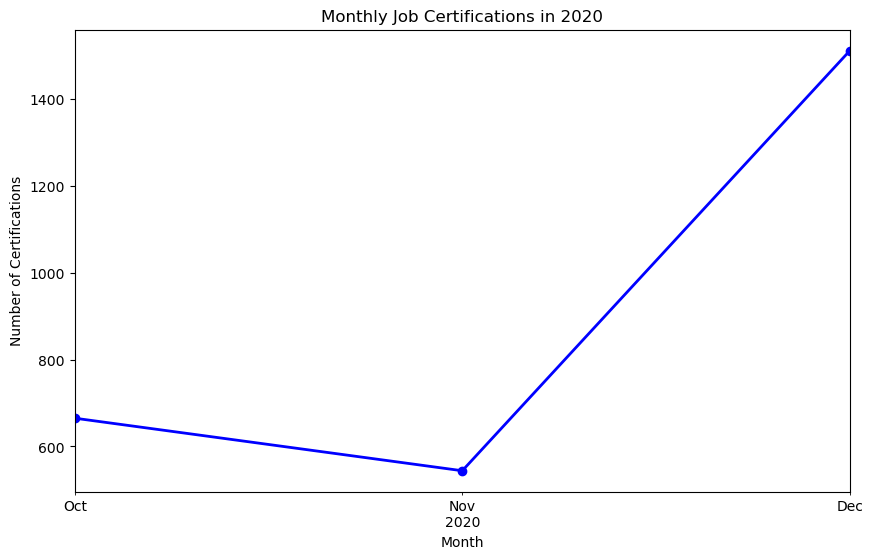

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='EMPLOYER_NAME'>

Text(0.5, 1.0, 'Top 10 Employers with Job Certifications')

Text(0.5, 0, 'Number of Certifications')

Text(0, 0.5, 'Employer Name')

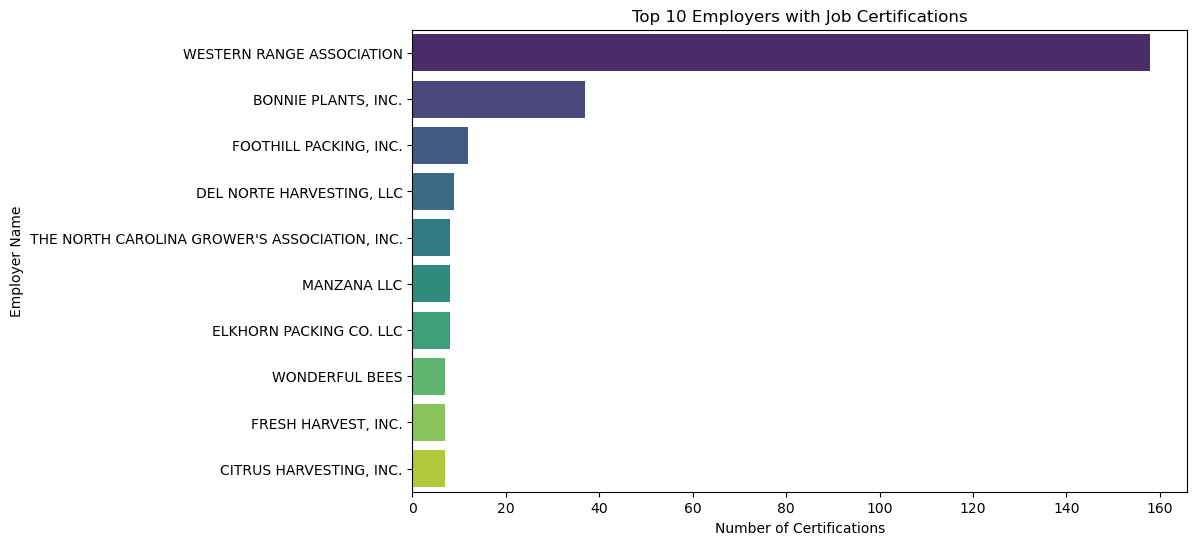

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

jobs['DECISION_MONTH'] = jobs['DECISION_DATE'].dt.to_period('M')

# Viz 1 - Monthly Job Certifications Trend Near Covid
monthly_certifications = jobs.groupby('DECISION_MONTH').size()
plt.figure(figsize=(10, 6))
monthly_certifications.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Monthly Job Certifications in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Certifications')
plt.show()

# Viz 2 - Top 10 Employers by Job Certifications
top_employers = jobs['EMPLOYER_NAME'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_employers.values, y=top_employers.index, palette='viridis')
plt.title('Top 10 Employers with Job Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Employer Name')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_count : Removed 135 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


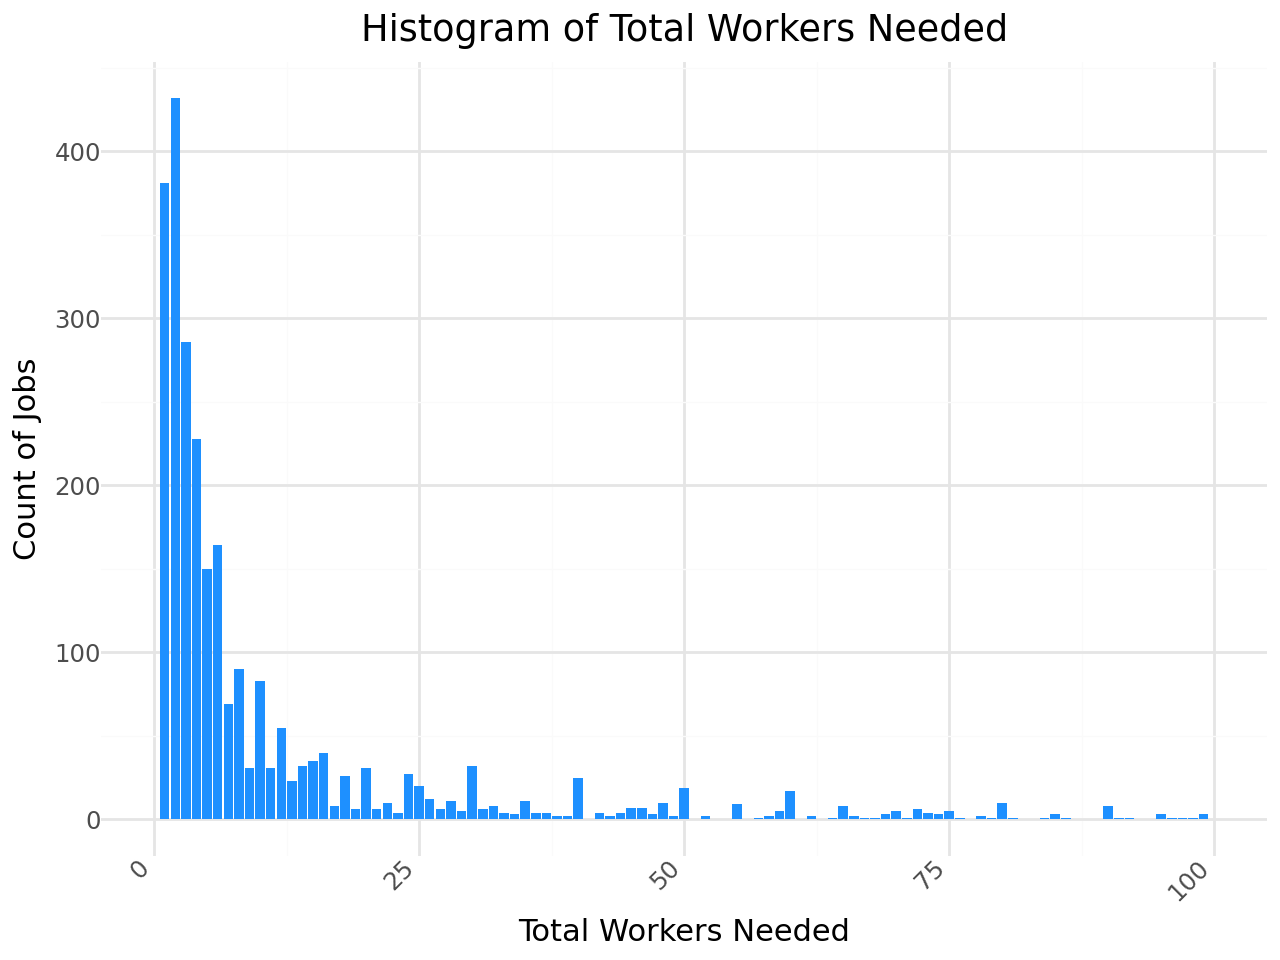

In [125]:
from plotnine import ggplot

# Assuming the 'jobs' DataFrame has a column 'NATURE_OF_TEMPORARY_NEED' with the counts already computed

x_axis_range = (0, 100)  

(
    ggplot(jobs) + 
    aes(x='TOTAL_WORKERS_NEEDED') + 
    geom_bar(fill='dodgerblue') +  # Counts the number of occurrences for each category
    labs(title='Histogram of Total Workers Needed',
         x='Total Workers Needed',
         y='Count of Jobs') +
    theme_minimal() + 
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +  
    scale_x_continuous(limits=x_axis_range)  
)


In [ ]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import geopandas as gpd
# from shapely.geometry import Point
# import pandas as pd
# import matplotlib.pyplot as plt

# # Subset to only Georgia
# jobs_GA = jobs.loc[jobs.EMPLOYER_STATE == 'GA'].reset_index(drop=True)
# jobs_GA['Address'] = jobs_GA['EMPLOYER_ADDRESS_1'] + ', ' + jobs_GA['EMPLOYER_CITY'] + ', ' + jobs_GA['EMPLOYER_STATE']

# # Initialize Nominatim API
# geolocator = Nominatim(user_agent="myGeocoder")

# # To prevent spamming the service, use RateLimiter to add a delay between calls
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# # Geocode the entire dataframe (this can be slow, consider adding progress bar or print statements)
# jobs_GA['geocoded'] = jobs_GA['Address'].apply(geocode)

# # Extract the latitude and longitude from the location column
# jobs_GA['lat'] = jobs_GA['geocoded'].apply(lambda loc: loc.latitude if loc else None)
# jobs_GA['lon'] = jobs_GA['geocoded'].apply(lambda loc: loc.longitude if loc else None)

# # Drop rows that could not be geocoded
# jobs_GA = jobs_GA.dropna(subset=['lat', 'lon'])

# # Load Georgia's map shapefile if you have one or use 'naturalearth_lowres' for a simple base map
# # Here we assume you have a shapefile for Georgia
# # Georgia_map = gpd.read_file('Georgia.shp')

# # For simplicity, let's use a world map and focus on the area around Georgia
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# georgia_bbox = world.cx[-85:-80, 30:35]  # Bounding box for Georgia

# # Define GeoPandas DataFrame
# geometry = [Point(xy) for xy in zip(jobs_GA['lon'], jobs_GA['lat'])]
# geo_df = gpd.GeoDataFrame(jobs_GA, 
#                           crs='EPSG:4326', 
#                           geometry=geometry)

# # Visualization
# fig, ax = plt.subplots(figsize=(10, 10))
# georgia_bbox.plot(ax=ax, color='lightgrey')
# geo_df.plot(ax=ax, color='blue', markersize=10, alpha=0.5)
# ax.set_title('Jobs in Georgia')
# plt.show()


In [127]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Subset to only Georgia
jobs_GA = jobs.loc[jobs.EMPLOYER_STATE == 'GA'].reset_index(drop=True)
jobs_GA['Address'] = jobs_GA['EMPLOYER_ADDRESS_1'] + ', ' + jobs_GA['EMPLOYER_CITY'] + ', ' + jobs_GA['EMPLOYER_STATE']

# Initialize Nominatim API
geolocator = Nominatim(user_agent="myGeocoder")

# To prevent spamming the service, use RateLimiter to add a delay between calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Geocode the entire dataframe (this can be slow, consider adding progress bar or print statements)
jobs_GA['location'] = jobs_GA['Address'].apply(lambda addr: geocode(addr))

# Extract the latitude and longitude from the location column
jobs_GA['latitude'] = jobs_GA['location'].apply(lambda loc: loc.latitude if loc else None)
jobs_GA['longitude'] = jobs_GA['location'].apply(lambda loc: loc.longitude if loc else None)

# Drop rows that could not be geocoded
jobs_GA.dropna(subset=['latitude', 'longitude'], inplace=True)

# Define GeoPandas DataFrame
geometry = [Point(xy) for xy in zip(jobs_GA['longitude'], jobs_GA['latitude'])]
geo_df = gpd.GeoDataFrame(jobs_GA, 
                          crs='EPSG:4326', 
                          geometry=geometry)

# Use 'naturalearth_lowres' as a simple base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Focus on the bounding box for Georgia, USA
georgia_bbox = world.cx[-85:-80, 30:35]  # Bounding box for Georgia

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))
georgia_bbox.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, color='blue', markersize=10, alpha=0.5)
ax.set_title('Jobs in Georgia')
plt.show()


RateLimiter caught an error, retrying (0/2 tries). Called with (*('534 McLain Cemetery Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda

RateLimiter swallowed an error after 2 retries. Called with (*('534 McLain Cemetery Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/l

RateLimiter caught an error, retrying (1/2 tries). Called with (*('9465 Miami Valley Rd, Fort Valley, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anacon

RateLimiter caught an error, retrying (0/2 tries). Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 503

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/extra/rate_limiter.py", 

RateLimiter swallowed an error after 2 retries. Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/pyth

RateLimiter caught an error, retrying (1/2 tries). Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/p

RateLimiter caught an error, retrying (0/2 tries). Called with (*('19 Lupe Lane, Wray, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 503

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/extra/rate_limiter.py", line 1

RateLimiter swallowed an error after 2 retries. Called with (*('19 Lupe Lane, Wray, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1935 Ross Bowen Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/li

RateLimiter caught an error, retrying (0/2 tries). Called with (*('316 BIRD DOG CIRCLE, COBBTOWN, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 503

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/extra/rate_limiter.

RateLimiter swallowed an error after 2 retries. Called with (*('316 BIRD DOG CIRCLE, COBBTOWN, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2999 Old Collins Cobbtown Road, Collins, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/

RateLimiter caught an error, retrying (0/2 tries). Called with (*('524 Plant Farm Road, Adel, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 503

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/extra/rate_limiter.py",

RateLimiter swallowed an error after 2 retries. Called with (*('524 Plant Farm Road, Adel, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/pyt

RateLimiter caught an error, retrying (1/2 tries). Called with (*('237 Red Rock Road, Parrott, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib

RateLimiter caught an error, retrying (0/2 tries). Called with (*('611 Church Street, Vidalia, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 503

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/extra/rate_limiter.py"

RateLimiter swallowed an error after 2 retries. Called with (*('611 Church Street, Vidalia, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/py

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1284 Hatch Parkway N, Baxley, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 1386, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/l

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1837 Highway 195, Leesburg, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 503

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/geopy/extra/rate_limiter.py"

RateLimiter caught an error, retrying (0/2 tries). Called with (*('562 Coy Cox Rd., Omega, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_

RateLimiter swallowed an error after 2 retries. Called with (*('562 Coy Cox Rd., Omega, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e
 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('788 Sam Beasley Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1188 Lawson Rd., Suite B, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    r

RateLimiter swallowed an error after 2 retries. Called with (*('1188 Lawson Rd., Suite B, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    rais

RateLimiter caught an error, retrying (1/2 tries). Called with (*('459 HENRY MOXLEY ROAD, COBBTOWN, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    r

RateLimiter caught an error, retrying (0/2 tries). Called with (*('170 Jr Suber Rd., Norman Park, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    rai

RateLimiter swallowed an error after 2 retries. Called with (*('170 Jr Suber Rd., Norman Park, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('116 6th Street South, Pitts, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1012 W. CENTRAL AVE, MOULTRIE, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    rai

RateLimiter swallowed an error after 2 retries. Called with (*('1012 W. CENTRAL AVE, MOULTRIE, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('153 smith st, berlin, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e


RateLimiter caught an error, retrying (0/2 tries). Called with (*('919 GA Hwy 33 S, Cordele, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise ne

RateLimiter swallowed an error after 2 retries. Called with (*('919 GA Hwy 33 S, Cordele, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1935 Ross Bowen Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise

RateLimiter caught an error, retrying (0/2 tries). Called with (*('172 Herring Road, Lake Park, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise

RateLimiter swallowed an error after 2 retries. Called with (*('172 Herring Road, Lake Park, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise ne

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1386 US Hwy 1 South, Alma, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise n

KeyboardInterrupt: 

In [128]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Subset to only Georgia
jobs_GA = jobs[jobs['EMPLOYER_STATE'] == 'GA'].copy()
jobs_GA['Address'] = jobs_GA['EMPLOYER_ADDRESS_1'] + ', ' + jobs_GA['EMPLOYER_CITY'] + ', GA'

# Initialize Nominatim API with a higher timeout and more delay
geolocator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3, error_wait_seconds=10)

# Create an empty list to hold geocode results
geocoded_results = []

# Loop through the addresses and apply the geocode function with error handling
for address in jobs_GA['Address']:
    try:
        location = geocode(address)
        if location:
            geocoded_results.append((location.longitude, location.latitude))
        else:
            geocoded_results.append((None, None))
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
        geocoded_results.append((None, None))

# Add the geocoding results to the DataFrame
jobs_GA['lon'], jobs_GA['lat'] = zip(*geocoded_results)
jobs_GA.dropna(subset=['lon', 'lat'], inplace=True)

# Define the geometry for a GeoDataFrame
geometry = [Point(xy) for xy in zip(jobs_GA['lon'], jobs_GA['lat'])]
geo_df = gpd.GeoDataFrame(jobs_GA, geometry=geometry)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
georgia_bbox = world.cx[-85:-80, 30:35]
georgia_bbox.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, color='blue', markersize=5)
plt.show()


RateLimiter caught an error, retrying (0/2 tries). Called with (*('534 McLain Cemetery Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    r

RateLimiter swallowed an error after 2 retries. Called with (*('534 McLain Cemetery Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    rais

RateLimiter caught an error, retrying (1/2 tries). Called with (*('9465 Miami Valley Rd, Fort Valley, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise ne

RateLimiter swallowed an error after 2 retries. Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e

RateLimiter caught an error, retrying (1/2 tries). Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise ne

RateLimiter caught an error, retrying (0/2 tries). Called with (*('19 Lupe Lane, Wray, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e
  

RateLimiter swallowed an error after 2 retries. Called with (*('19 Lupe Lane, Wray, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e
  Fil

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1935 Ross Bowen Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise

RateLimiter caught an error, retrying (0/2 tries). Called with (*('316 BIRD DOG CIRCLE, COBBTOWN, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    rai

RateLimiter swallowed an error after 2 retries. Called with (*('316 BIRD DOG CIRCLE, COBBTOWN, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2999 Old Collins Cobbtown Road, Collins, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_reque

RateLimiter caught an error, retrying (0/2 tries). Called with (*('524 Plant Farm Road, Adel, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise n

RateLimiter swallowed an error after 2 retries. Called with (*('524 Plant Farm Road, Adel, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_

RateLimiter caught an error, retrying (1/2 tries). Called with (*('237 Red Rock Road, Parrott, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('611 Church Street, Vidalia, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise 

KeyboardInterrupt: 

In [131]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

# Subset to only Georgia
jobs_GA = jobs[jobs['EMPLOYER_STATE'] == 'GA'].copy()
jobs_GA['Address'] = jobs_GA['EMPLOYER_ADDRESS_1'] + ', ' + jobs_GA['EMPLOYER_CITY'] + ', GA'

# Initialize Nominatim API with a higher timeout
geolocator = Nominatim(user_agent="geoapiExercises")

# Set min_delay_seconds to 10 and error_wait_seconds to at least 10 or more
geocode_with_delay = RateLimiter(geolocator.geocode, min_delay_seconds=10, error_wait_seconds=10)

# Define an empty list to store geocoding results
geocoded_results = []

# Geocode addresses with a significant delay between each call
for address in jobs_GA['Address']:`
    try:
        # Geocode the address and append the result tuple
        location = geocode_with_delay(address)
        geocoded_results.append((location.longitude, location.latitude) if location else (None, None))
    except Exception as e:
        # If an error occurs, append None values
        geocoded_results.append((None, None))
        print(f"Error geocoding {address}: {e}")

# Add the geocoding results to the DataFrame
jobs_GA['lon'], jobs_GA['lat'] = zip(*geocoded_results)

# Remove entries that couldn't be geocoded
jobs_GA.dropna(subset=['lon', 'lat'], inplace=True)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('534 McLain Cemetery Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    r

RateLimiter swallowed an error after 2 retries. Called with (*('534 McLain Cemetery Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    rais

RateLimiter caught an error, retrying (1/2 tries). Called with (*('9465 Miami Valley Rd, Fort Valley, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
   

RateLimiter caught an error, retrying (0/2 tries). Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise ne

RateLimiter swallowed an error after 2 retries. Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e

RateLimiter caught an error, retrying (1/2 tries). Called with (*('30 Sand Creek Rd, Tifton, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise ne

RateLimiter caught an error, retrying (0/2 tries). Called with (*('19 Lupe Lane, Wray, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e
  

RateLimiter swallowed an error after 2 retries. Called with (*('19 Lupe Lane, Wray, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e
  Fil

RateLimiter caught an error, retrying (1/2 tries). Called with (*('1935 Ross Bowen Road, Lyons, GA',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'jobs_GA' DataFrame has 'lon' and 'lat' columns after geocoding

# Simple scatter plot of geocoded locations
plt.figure(figsize=(10, 6))
plt.scatter(jobs_GA['lon'], jobs_GA['lat'], c='blue', alpha=0.5, label='Job Locations')
plt.title('Geocoded Job Locations in Georgia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
